# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Kevin Cortés - Jarold García
*Métodos computacionales 2024-II*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
import math
from scipy.integrate import solve_ivp
from scipy.special import ellipk
from scipy.signal import find_peaks
from scipy.linalg import eig

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

In [ ]:
# Método de Euler
def euler_method(f, t0, N0, h, t_end):
    """
    Implementación del método de Euler para resolver la ecuación diferencial dN/dt = -lambda * N.

    f: función que define la EDO dN/dt = f(t, N)
    t0, N0: condición inicial
    h: tamaño del paso
    t_end: tiempo final para la integración
    """
    # Número de pasos
    n_steps = int((t_end - t0) / h)

    # Arreglos para los valores de t y N
    t = np.zeros(n_steps + 1)
    N = np.zeros(n_steps + 1)

    # Condiciones iniciales
    t[0] = t0
    N[0] = N0

    # Aplicar el método de Euler
    for i in range(n_steps):
        t[i+1] = t[i] + h
        N[i+1] = N[i] + h * f(t[i], N[i])

    return t, N

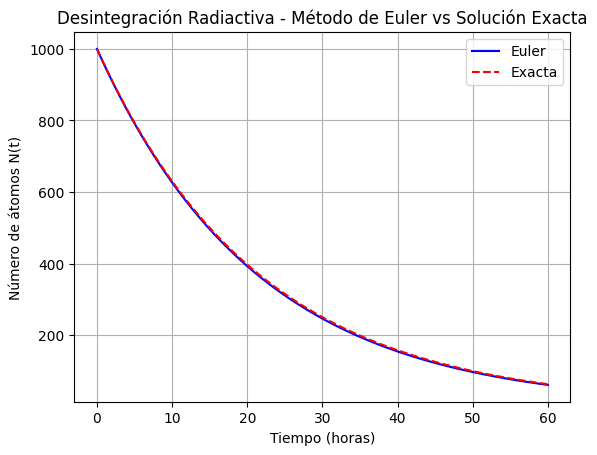

In [ ]:

# Parámetros
t_half = 15  # Tiempo de vida media (horas)
N0 = 1000    # Número inicial de átomos
lambda_ = np.log(2) / t_half  # Tasa de decaimiento

# Función que define la EDO dN/dt = -lambda * N
f = lambda t, N: -lambda_ * N

# Función exacta
N_exacta = lambda t: N0 * np.exp(-lambda_ * t)

# Resolución usando el método de Euler
t_end = 60  # Tiempo final para la simulación (horas)
h = 0.5     # Tamaño del paso (horas)
t_euler, N_euler = euler_method(f, 0, N0, h, t_end)

# Solución exacta
t_exacta = np.linspace(0, t_end, 100)
N_exact = N_exacta(t_exacta)

# Graficar
plt.plot(t_euler, N_euler, label='Euler', color='blue')
plt.plot(t_exacta, N_exact, label='Exacta', color='red', linestyle='--')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de átomos N(t)')
plt.title('Desintegración Radiactiva - Método de Euler vs Solución Exacta')
plt.legend()
plt.grid(True)
plt.show()


# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


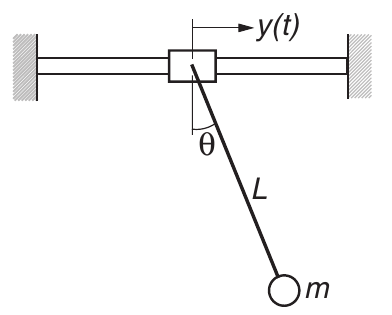

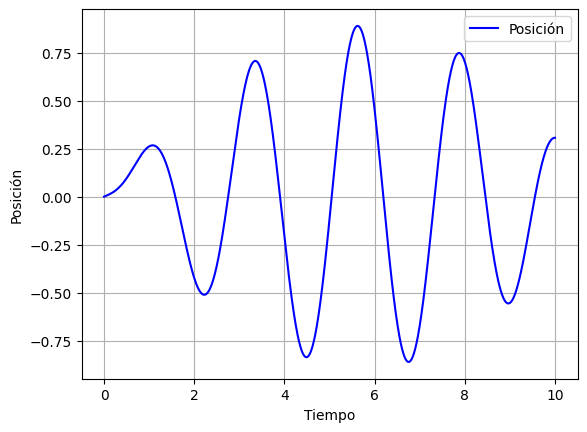

El valor máximo de theta es: 0.8900763427024491


In [3]:
def euler_orden2(f, t0, x0, fpx0, h, t_end):
  n_steps = int((t_end - t0) / h)

  t = np.zeros(n_steps + 1)
  x = np.zeros(n_steps + 1)
  fp = np.zeros(n_steps + 1)

  t[0], x[0], fp[0] = t0, x0, fpx0
  for i in range(n_steps):
    t[i+1] = t[i] + h
    x[i+1] = x[i] + h * fp[i]
    fp[i+1] = fp[i] + h * f(t[i], x[i], fp[i])

  return t, x, fp

#parametros
g = 9.8
L = 1
Y = 0.25
omega = 2.5

f = lambda t,theta,v: -g/L * np.sin(theta) + Y*(omega**2) / L * np.cos(theta) * np.sin(omega*t)

#condiciones iniciales

t0, theta0, v0 = 0, 0, 0.1
h = 0.01
t_end = 10

#resolver
t, theta, v = euler_orden2(f, t0, theta0, v0, h, t_end)

plt.plot(t, theta, label='Posición', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.show()

#Máximo valor de theta
max_value = np.max(theta)
min_value = np.min(theta)
if np.abs(max_value) > np.abs(min_value):
  print(f'El valor máximo de theta es: {max_value}')
elif np.abs(min_value) > np.abs(max_value):
  print(f'El valor máximo de theta es: {min_value}')
else:
  print(f'El valor máximo de theta es: {max_value}')


# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

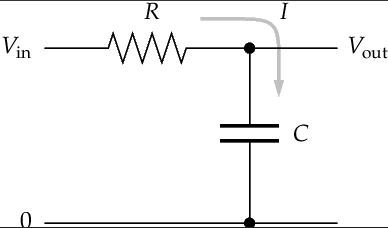


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


In [ ]:
# Definimos la onda cuadrada de entrada
def V_in(t):
    return np.where(np.floor(2 * t) % 2 == 0, 1, -1)

# Ecuación diferencial para el filtro RC
def dV_out_dt(V_out, t, RC):
    return (1/RC) * (V_in(t) - V_out)

# Método de Runge-Kutta de 4to orden
def runge_kutta(V_out0, t, RC):
    V_out = np.zeros_like(t)
    V_out[0] = V_out0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        k1 = dt * dV_out_dt(V_out[i-1], t[i-1], RC)
        k2 = dt * dV_out_dt(V_out[i-1] + 0.5*k1, t[i-1] + 0.5*dt, RC)
        k3 = dt * dV_out_dt(V_out[i-1] + 0.5*k2, t[i-1] + 0.5*dt, RC)
        k4 = dt * dV_out_dt(V_out[i-1] + k3, t[i-1] + dt, RC)
        V_out[i] = V_out[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return V_out


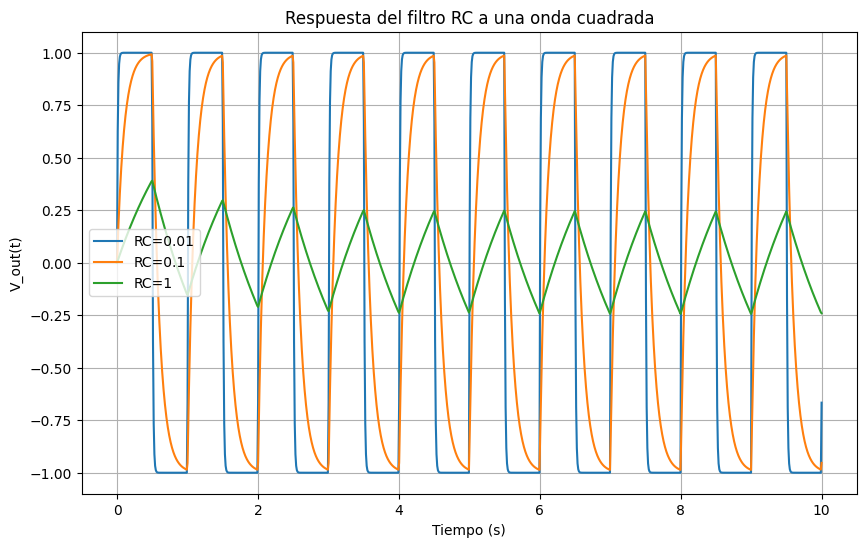

In [ ]:

# Parámetros
t = np.linspace(0, 10, 1000)
RC_values = [0.01, 0.1, 1]
V_out0 = 0
t_span = (0,10)

# Graficamos las soluciones
plt.figure(figsize=(10, 6))

for RC in RC_values:
    V_out = runge_kutta(V_out0, t, RC)
    plt.plot(t, V_out, label=f'RC={RC}')

plt.title('Respuesta del filtro RC a una onda cuadrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('V_out(t)')
plt.legend()
plt.grid(True)
plt.show()


# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [ ]:

def pendulum_eq(u, t):
    return np.array([u[1], - (g / l) * np.sin(u[0])])

def runge_kutta_4(derivs, u0, t):
    dt = t[1] - t[0]
    n = len(t)
    u = np.zeros((n, len(u0)))
    u[0] = u0

    for i in range(1, n):
        k1 = dt * derivs(u[i-1], t[i-1])
        k2 = dt * derivs(u[i-1] + 0.5*k1, t[i-1] + 0.5*dt)
        k3 = dt * derivs(u[i-1] + 0.5*k2, t[i-1] + 0.5*dt)
        k4 = dt * derivs(u[i-1] + k3, t[i-1] + dt)
        u[i] = u[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return u

def find_period(t, theta):
    peaks, _ = find_peaks(theta)
    if len(peaks) < 2:
        return np.nan
    return 2 * (t[peaks[1]] - t[peaks[0]])

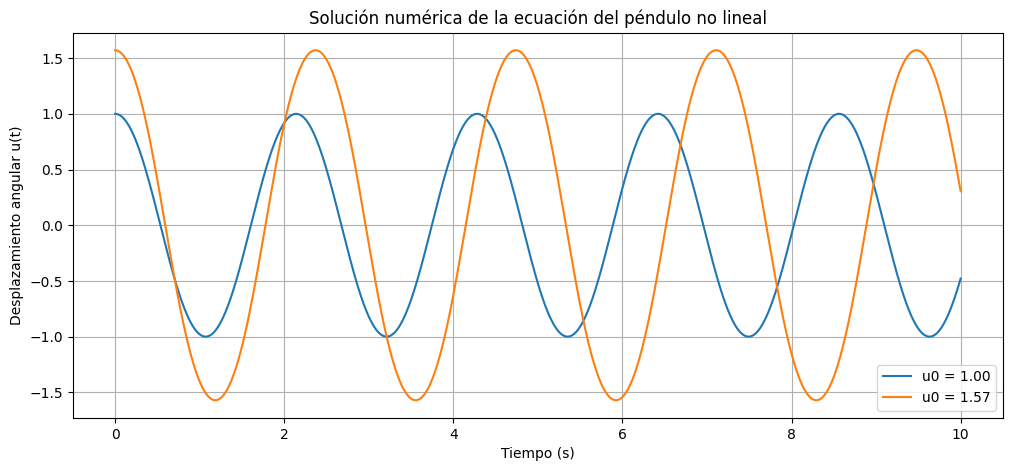

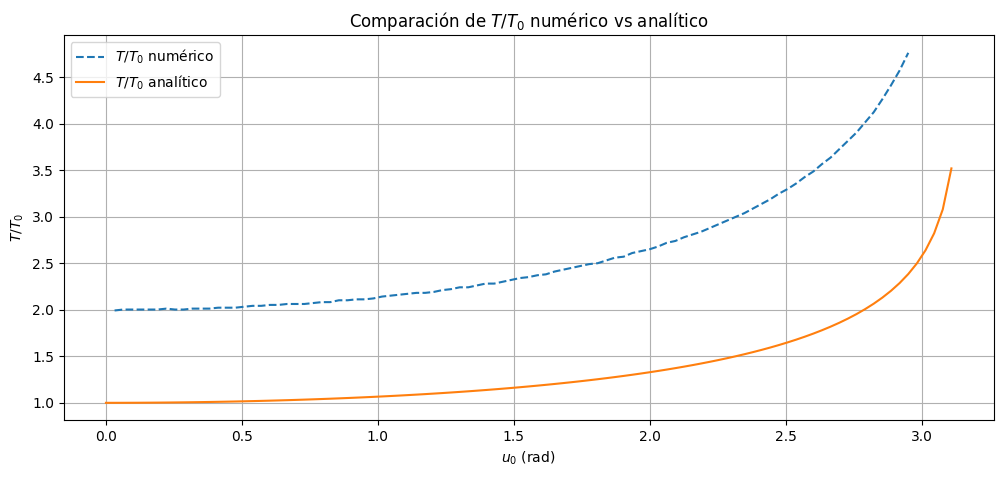

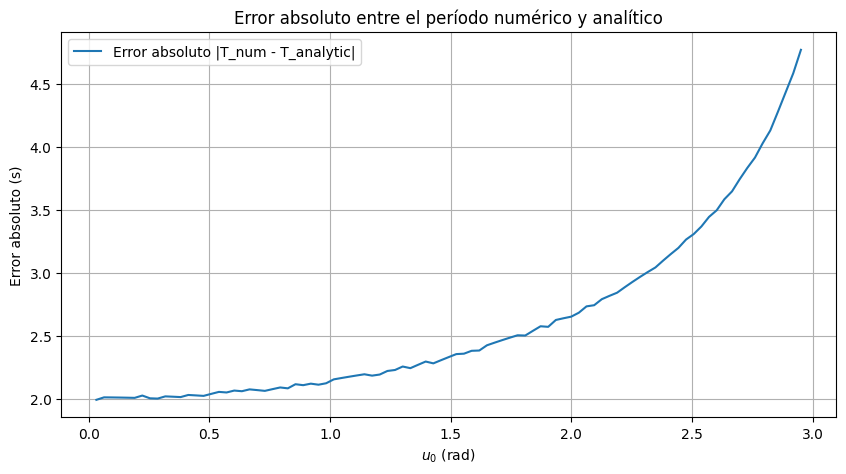

In [ ]:
# Parámetros físicos
g = 9.8  # m/s^2
l = 1.0  # m


# Integración numérica para diferentes valores de u0
t = np.arange(0, 10, 0.001)
u0_values = [1, np.pi/2]

plt.figure(figsize=(12, 5))
for u0 in u0_values:
    u0_conditions = [u0, 0]
    u = runge_kutta_4(pendulum_eq, u0_conditions, t)
    plt.plot(t, u[:, 0], label=f'u0 = {u0:.2f}')

plt.title('Solución numérica de la ecuación del péndulo no lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento angular u(t)')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de T/T0 analítico
T0 = 2 * np.pi * np.sqrt(l / g)
u0_values = np.linspace(0, np.pi, 100)
T_analytic = T0 * (2 / np.pi) * np.array([ellipk(np.sin(u0 / 2) ** 2) for u0 in u0_values])

# Encontrar períodos numéricos
T_numeric = []
t = np.arange(0, 10, 0.01)
for u0 in u0_values:
    u0_conditions = [u0, 0]
    u = runge_kutta_4(pendulum_eq, u0_conditions, t)
    T_num = find_period(t, u[:, 0])
    T_numeric.append(T_num)

T_numeric = np.array(T_numeric)

# Graficar comparación
plt.figure(figsize=(12, 5))
plt.plot(u0_values, T_numeric / T0, label='$T/T_0$ numérico', linestyle='dashed')
plt.plot(u0_values, T_analytic / T0, label='$T/T_0$ analítico')
plt.title('Comparación de $T/T_0$ numérico vs analítico')
plt.xlabel('$u_0$ (rad)')
plt.ylabel('$T/T_0$')
plt.legend()
plt.grid(True)
plt.show()

# Calcular error absoluto
error = np.abs(T_numeric - T_analytic)

# Graficar error absoluto
plt.figure(figsize=(10, 5))
plt.plot(u0_values, error, label='Error absoluto |T_num - T_analytic|')
plt.title('Error absoluto entre el período numérico y analítico')
plt.xlabel('$u_0$ (rad)')
plt.ylabel('Error absoluto (s)')
plt.legend()
plt.grid(True)
plt.show()


# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$
\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},

$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v

$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x

$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},

$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [ ]:
def F_force(t, w):
    return F0 * np.cos(w * t) * np.exp(-t**2 / T**2)

def derivatives(state, t, gamma, w=0, forced=False):
    x, v = state
    F = F_force(t, w) if forced else 0
    dxdt = v
    dvdt = (F/m) - gamma * v - w0**2 * x
    return np.array([dxdt, dvdt])

def runge_kutta_4(derivs, state0, t, gamma, w=0, forced=False):
    dt = t[1] - t[0]
    states = np.zeros((len(t), len(state0)))
    states[0] = state0

    for i in range(1, len(t)):
        k1 = dt * derivs(states[i-1], t[i-1], gamma, w, forced)
        k2 = dt * derivs(states[i-1] + 0.5*k1, t[i-1] + 0.5*dt, gamma, w, forced)
        k3 = dt * derivs(states[i-1] + 0.5*k2, t[i-1] + 0.5*dt, gamma, w, forced)
        k4 = dt * derivs(states[i-1] + k3, t[i-1] + dt, gamma, w, forced)
        states[i] = states[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return states

def energy(x, v):
    return 0.5 * m * v**2 + 0.5 * k * x**2

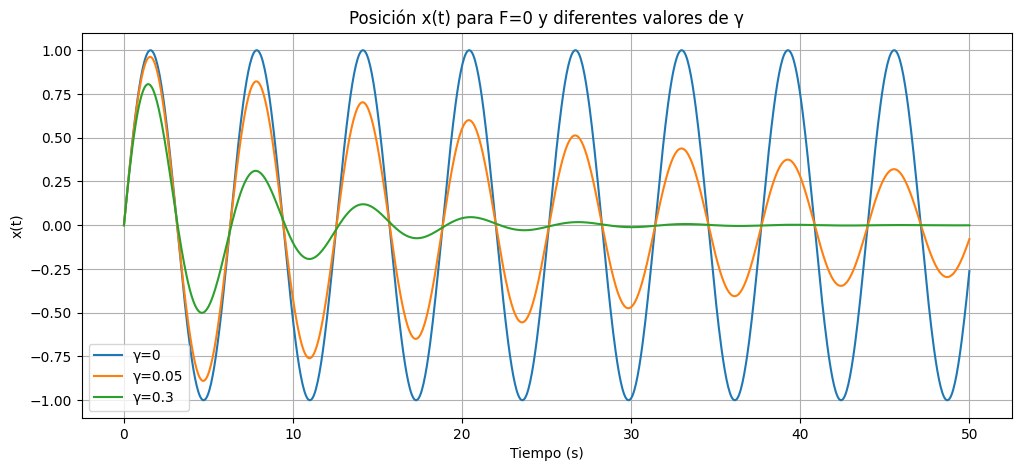

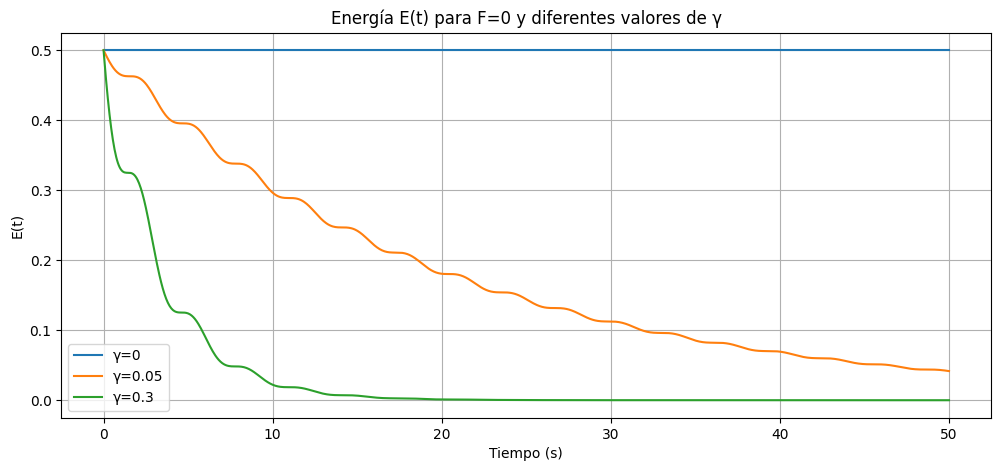

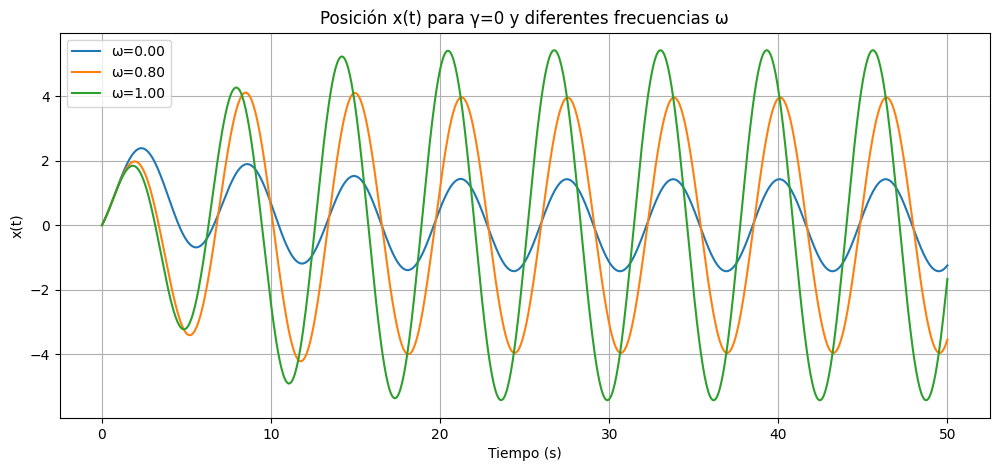

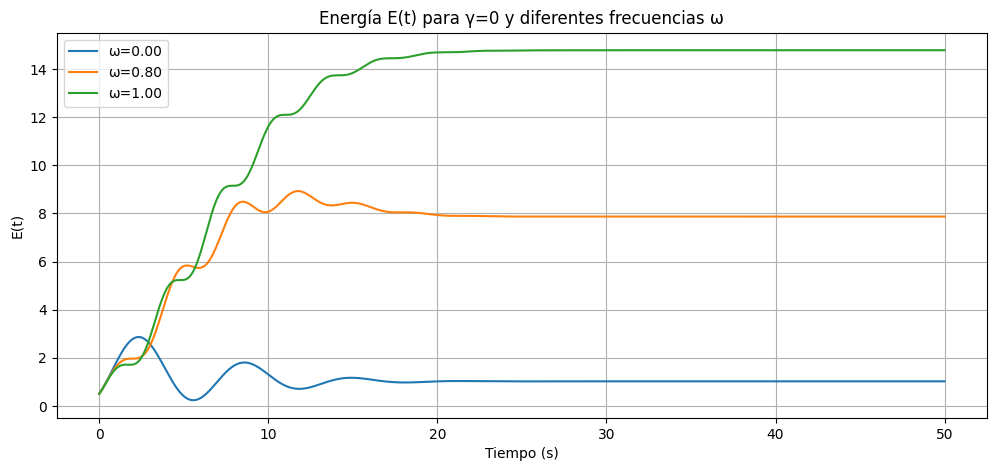

In [ ]:
# Parámetros
m = 1  # masa
k = 1  # constante elástica
w0 = np.sqrt(k/m)  # frecuencia angular natural
F0 = 1  # fuerza máxima
T = 10  # tiempo característico de la fuerza

# Tiempo
t = np.linspace(0, 50, 1000)
state0 = [0, 1]  # x(0) = 0, v(0) = 1

# Caso 1: F = 0, gamma = [0, 0.05, 0.3]
gamma_values = [0, 0.05, 0.3]
plt.figure(figsize=(12, 5))
for gamma in gamma_values:
    states = runge_kutta_4(derivatives, state0, t, gamma)
    x, v = states[:, 0], states[:, 1]
    E = energy(x, v)
    plt.plot(t, x, label=f'γ={gamma}')
plt.title('Posición x(t) para F=0 y diferentes valores de γ')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for gamma in gamma_values:
    states = runge_kutta_4(derivatives, state0, t, gamma)
    x, v = states[:, 0], states[:, 1]
    E = energy(x, v)
    plt.plot(t, E, label=f'γ={gamma}')
plt.title('Energía E(t) para F=0 y diferentes valores de γ')
plt.xlabel('Tiempo (s)')
plt.ylabel('E(t)')
plt.legend()
plt.grid(True)
plt.show()

# Caso 2: γ=0, F = F0 * cos(ωt) * exp(-t²/T²)
w_values = [0, 0.8*w0, w0]
plt.figure(figsize=(12, 5))
for w in w_values:
    states = runge_kutta_4(derivatives, state0, t, 0, w, forced=True)
    x, v = states[:, 0], states[:, 1]
    plt.plot(t, x, label=f'ω={w:.2f}')
plt.title('Posición x(t) para γ=0 y diferentes frecuencias ω')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for w in w_values:
    states = runge_kutta_4(derivatives, state0, t, 0, w, forced=True)
    x, v = states[:, 0], states[:, 1]
    E = energy(x, v)
    plt.plot(t, E, label=f'ω={w:.2f}')
plt.title('Energía E(t) para γ=0 y diferentes frecuencias ω')
plt.xlabel('Tiempo (s)')
plt.ylabel('E(t)')
plt.legend()
plt.grid(True)
plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



In [ ]:
# Funciones para las derivadas
def lotka_volterra(x, y):
    dx = alpha * x - beta * x * y
    dy = -gamma * y + delta * x * y
    return dx, dy

# Método de Euler
def euler(f, x0, y0, t, h):
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0], y[0] = x0, y0

    for i in range(1, n):
        dx, dy = f(x[i-1], y[i-1])
        x[i] = x[i-1] + h * dx
        y[i] = y[i-1] + h * dy

    return x, y

# Método de Runge-Kutta de segundo orden
def rk2(f, x0, y0, t, h):
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0], y[0] = x0, y0

    for i in range(1, n):
        k1x, k1y = f(x[i-1], y[i-1])
        k2x, k2y = f(x[i-1] + h * k1x, y[i-1] + h * k1y)
        x[i] = x[i-1] + (h/2) * (k1x + k2x)
        y[i] = y[i-1] + (h/2) * (k1y + k2y)

    return x, y

# Método de Runge-Kutta de cuarto orden
def rk4(f, x0, y0, t, h):
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0], y[0] = x0, y0

    for i in range(1, n):
        k1x, k1y = f(x[i-1], y[i-1])
        k2x, k2y = f(x[i-1] + h/2 * k1x, y[i-1] + h/2 * k1y)
        k3x, k3y = f(x[i-1] + h/2 * k2x, y[i-1] + h/2 * k2y)
        k4x, k4y = f(x[i-1] + h * k3x, y[i-1] + h * k3y)

        x[i] = x[i-1] + (h/6) * (k1x + 2*k2x + 2*k3x + k4x)
        y[i] = y[i-1] + (h/6) * (k1y + 2*k2y + 2*k3y + k4y)

    return x, y

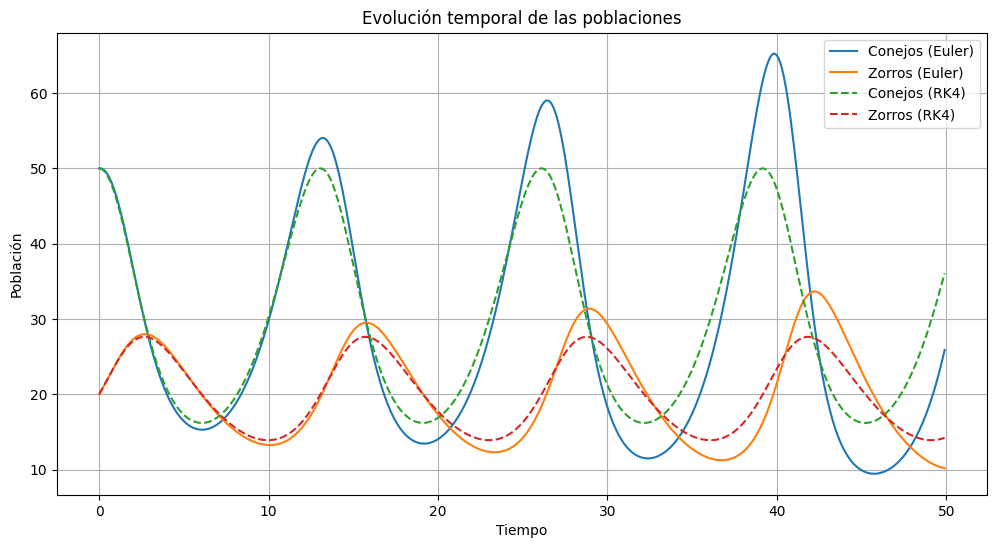

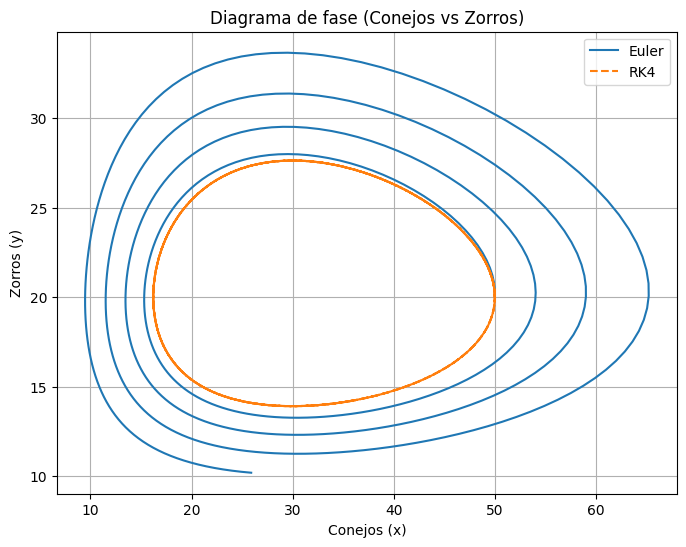

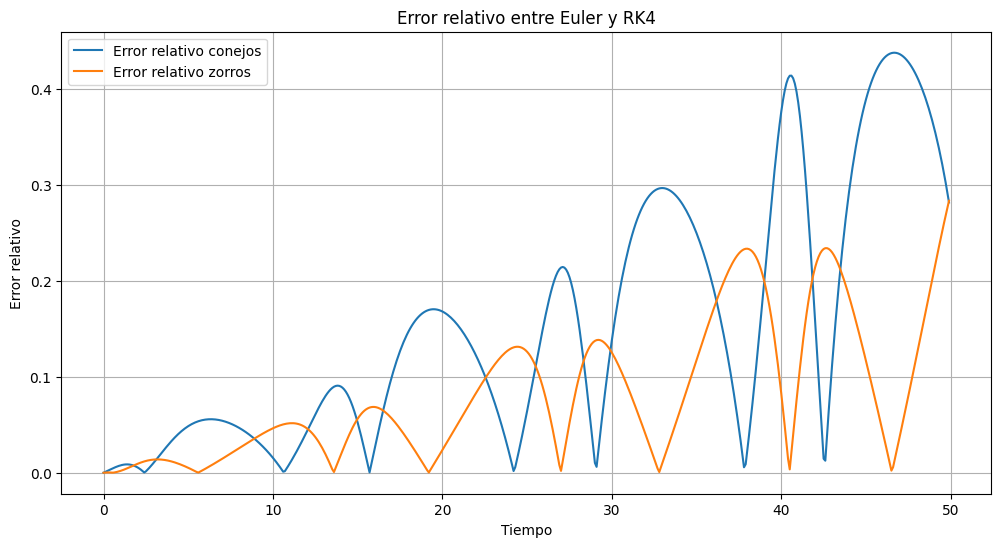

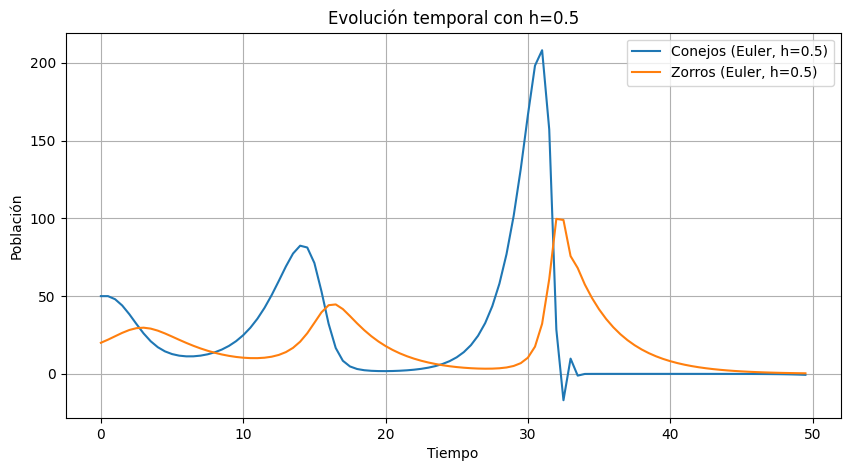

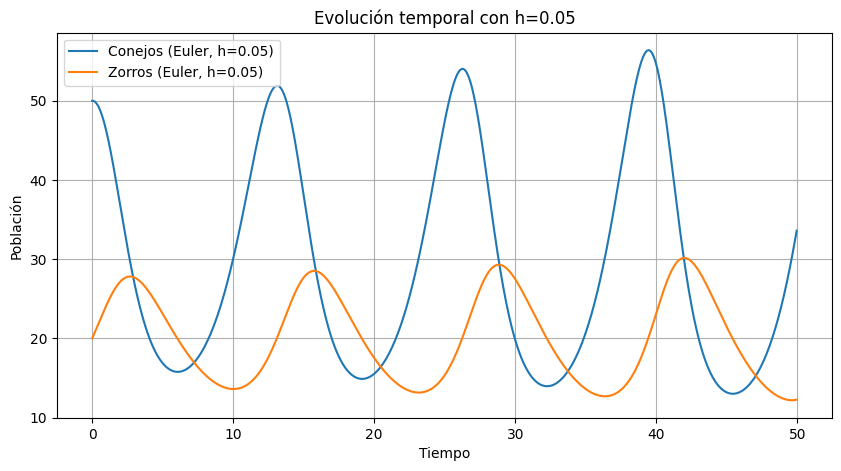

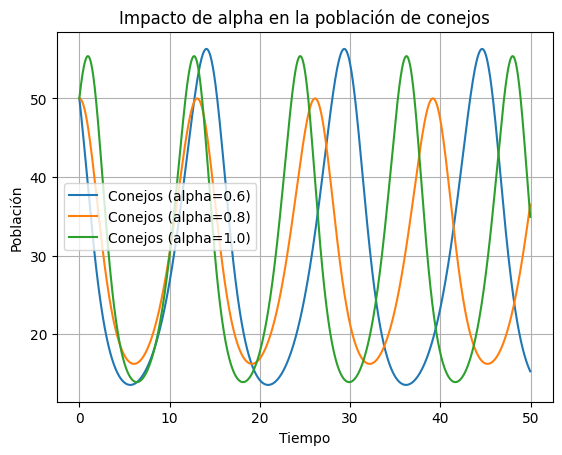

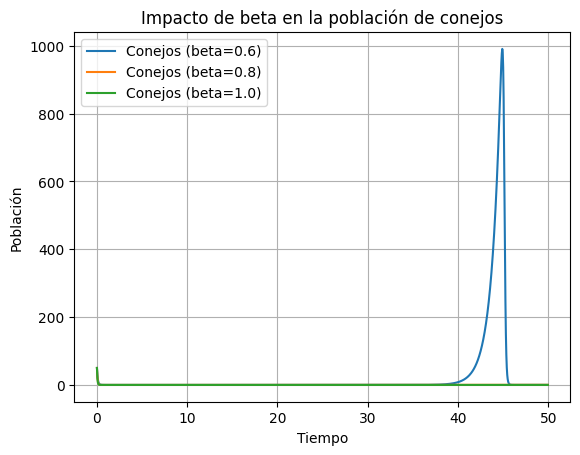

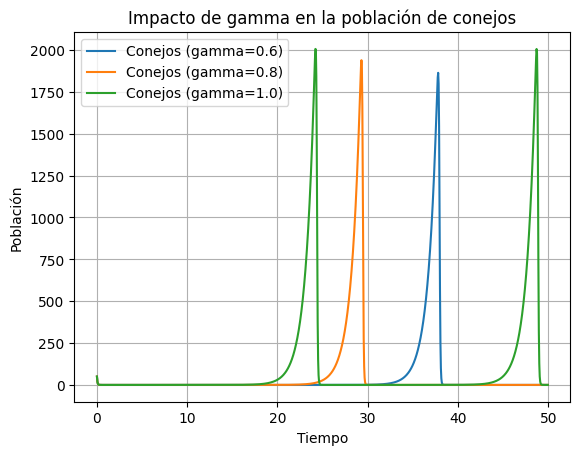

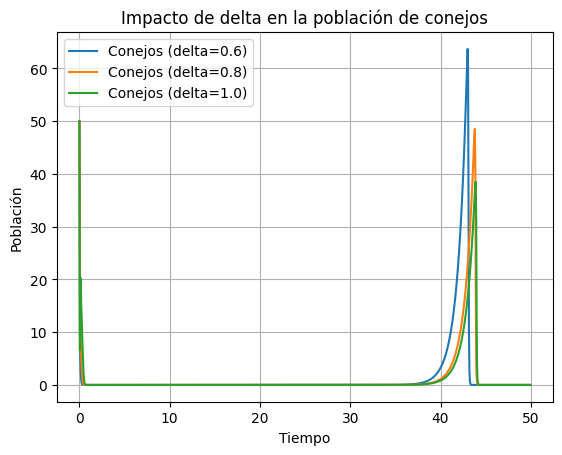

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
alpha = 0.8  # Tasa de reproducción de conejos
beta = 0.04  # Tasa de depredación
gamma = 0.3  # Tasa de mortalidad natural de zorros
delta = 0.01  # Eficiencia de conversión

# Configuración inicial
x0 = 50  # Población inicial de conejos
y0 = 20  # Población inicial de zorros
h = 0.1  # Paso temporal
t = np.arange(0, 50, h)

# Resolver sistemas
x_euler, y_euler = euler(lotka_volterra, x0, y0, t, h)
x_rk2, y_rk2 = rk2(lotka_volterra, x0, y0, t, h)
x_rk4, y_rk4 = rk4(lotka_volterra, x0, y0, t, h)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(t, x_euler, label='Conejos (Euler)')
plt.plot(t, y_euler, label='Zorros (Euler)')
plt.plot(t, x_rk4, '--', label='Conejos (RK4)')
plt.plot(t, y_rk4, '--', label='Zorros (RK4)')
plt.title('Evolución temporal de las poblaciones')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de fase
plt.figure(figsize=(8, 6))
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk4, y_rk4, '--', label='RK4')
plt.title('Diagrama de fase (Conejos vs Zorros)')
plt.xlabel('Conejos (x)')
plt.ylabel('Zorros (y)')
plt.legend()
plt.grid(True)
plt.show()

# Error relativo entre Euler y RK4
error_x = np.abs(x_euler - x_rk4) / np.abs(x_rk4)
error_y = np.abs(y_euler - y_rk4) / np.abs(y_rk4)

plt.figure(figsize=(12, 6))
plt.plot(t, error_x, label='Error relativo conejos')
plt.plot(t, error_y, label='Error relativo zorros')
plt.title('Error relativo entre Euler y RK4')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de estabilidad variando h
for h in [0.5, 0.05]:
    t = np.arange(0, 50, h)
    x_euler, y_euler = euler(lotka_volterra, x0, y0, t, h)
    plt.figure(figsize=(10, 5))
    plt.plot(t, x_euler, label=f'Conejos (Euler, h={h})')
    plt.plot(t, y_euler, label=f'Zorros (Euler, h={h})')
    plt.title(f'Evolución temporal con h={h}')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para modificar parámetros
def set_params(new_alpha=None, new_beta=None, new_gamma=None, new_delta=None):
    global alpha, beta, gamma, delta
    if new_alpha is not None: alpha = new_alpha
    if new_beta is not None: beta = new_beta
    if new_gamma is not None: gamma = new_gamma
    if new_delta is not None: delta = new_delta

# Variación de parámetros
param_values = [0.6, 0.8, 1.0]
param_names = ['alpha', 'beta', 'gamma', 'delta']

for param in param_names:
    for val in param_values:
        if param == 'alpha':
            set_params(new_alpha=val)
        elif param == 'beta':
            set_params(new_beta=val)
        elif param == 'gamma':
            set_params(new_gamma=val)
        elif param == 'delta':
            set_params(new_delta=val)

        x_rk4, y_rk4 = rk4(lotka_volterra, x0, y0, t, h)
        plt.plot(t, x_rk4, label=f'Conejos ({param}={val})')

    plt.title(f'Impacto de {param} en la población de conejos')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()


# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


In [ ]:
# Matriz del sistema A
def A_matrix(m, L, g, k):
    a = g / L
    b = k / m
    return np.array([
        [0, 1, 0, 0],
        [-(a + b), 0, b, 0],
        [0, 0, 0, 1],
        [b, 0, -(a + b), 0]
    ])

# Derivadas de estado dy/dt = A * y
def derivatives(y, t, A):
    return A @ y

# Método de Runge-Kutta de 4to orden
def runge_kutta_4(derivs, y0, t, A):
    dt = t[1] - t[0]
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(1, n):
        k1 = dt * derivs(y[i-1], t[i-1], A)
        k2 = dt * derivs(y[i-1] + 0.5*k1, t[i-1] + 0.5*dt, A)
        k3 = dt * derivs(y[i-1] + 0.5*k2, t[i-1] + 0.5*dt, A)
        k4 = dt * derivs(y[i-1] + k3, t[i-1] + dt, A)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return y

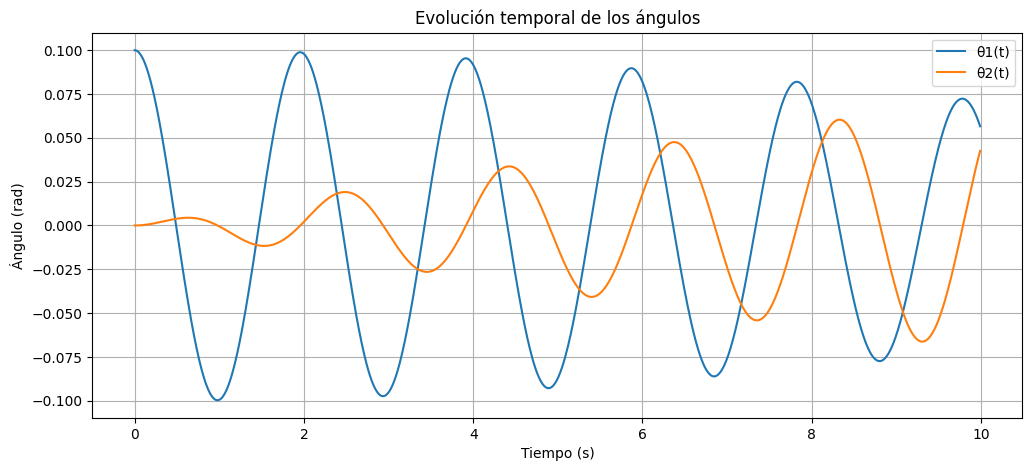

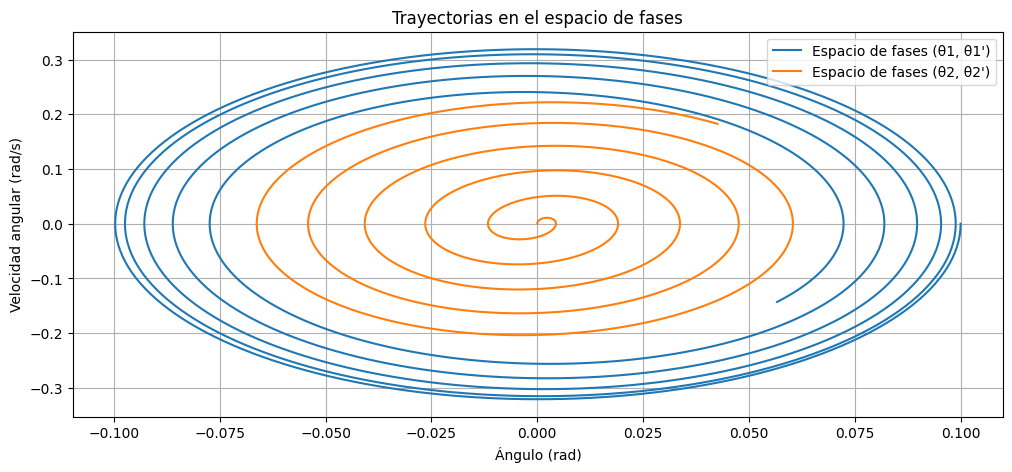

In [ ]:
# Parámetros físicos
m = 1  # masa (kg)
L = 1  # longitud del péndulo (m)
g = 9.81  # gravedad (m/s^2)
k = 0.5  # constante del resorte (N/m)

A = A_matrix(m, L, g, k)

# Condiciones iniciales
y0 = [0.1, 0, 0, 0]  # [θ1, θ1', θ2, θ2']

# Tiempo
t = np.arange(0, 10, 0.01)

# Resolver el sistema
y = runge_kutta_4(derivatives, y0, t, A)

# Extraer resultados
theta1, theta1_dot, theta2, theta2_dot = y.T

# Gráficas
plt.figure(figsize=(12, 5))
plt.plot(t, theta1, label='θ1(t)')
plt.plot(t, theta2, label='θ2(t)')
plt.title('Evolución temporal de los ángulos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(theta1, theta1_dot, label="Espacio de fases (θ1, θ1')")
plt.plot(theta2, theta2_dot, label="Espacio de fases (θ2, θ2')")
plt.title('Trayectorias en el espacio de fases')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.legend()
plt.grid(True)
plt.show()


# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter


In [ ]:
# Función para el potencial efectivo U
def U(x, y):
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    return -G * m1 / r1 - G * m2 / r2 - 0.5 * omega**2 * (x**2 + y**2)

# Matriz Jacobiana evaluada en L4
def jacobian_matrix(x, y):
    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)

    Uxx = G * m1 * (r1**2 - 3 * (x - x1)**2) / r1**5 + G * m2 * (r2**2 - 3 * (x - x2)**2) / r2**5 + omega**2
    Uyy = G * m1 * (r1**2 - 3 * (y - y1)**2) / r1**5 + G * m2 * (r2**2 - 3 * (y - y2)**2) / r2**5 + omega**2
    Uxy = 3 * G * m1 * (x - x1) * (y - y1) / r1**5 + 3 * G * m2 * (x - x2) * (y - y2) / r2**5

    A = np.array([
        [0, 1, 0, 0],
        [Uxx, 0, Uxy, 2 * omega],
        [0, 0, 0, 1],
        [Uxy, -2 * omega, Uyy, 0]
    ])
    return A

# Ecuaciones de movimiento linealizado
def linearized_motion(t, state, A):
    xi, xi_dot, eta, eta_dot = state
    dxi_dt = xi_dot
    deta_dt = eta_dot
    dxi_dot_dt = A[1, 0] * xi + A[1, 2] * eta + A[1, 3] * eta_dot
    deta_dot_dt = A[3, 0] * xi + A[3, 2] * eta + A[3, 1] * xi_dot
    return np.array([dxi_dt, dxi_dot_dt, deta_dt, deta_dot_dt])

# Método RK4 para resolver el sistema
def rk4_step(func, t, state, dt, A):
    k1 = func(t, state, A)
    k2 = func(t + dt/2, state + dt/2 * k1, A)
    k3 = func(t + dt/2, state + dt/2 * k2, A)
    k4 = func(t + dt, state + dt * k3, A)
    return state + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

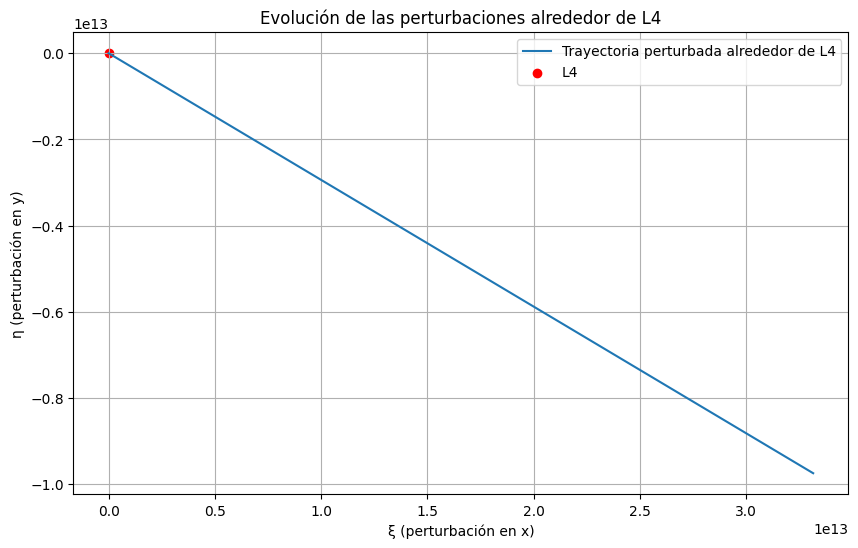

Autovalores de la matriz Jacobiana evaluada en L4:
λ_1 = 0.0000 + 1.9002i
λ_2 = 0.0000 + -1.9002i
λ_3 = 0.7148 + 0.0000i
λ_4 = -0.7148 + 0.0000i
La configuración es INESTABLE ya que μ = 0.0909 >= 0.0385


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Parámetros del sistema
G = 1.0  # Constante gravitacional (unidades arbitrarias)
m1 = 1.0  # Masa del cuerpo primario
m2 = 0.1  # Masa del cuerpo secundario
mu = m2 / (m1 + m2)  # Razón de masas
omega = 1.0  # Velocidad angular del sistema rotante

# Coordenadas de los cuerpos masivos en el sistema rotante
x1, y1 = -mu, 0
x2, y2 = 1 - mu, 0

# Coordenadas de los puntos de Lagrange L4 y L5
xL4 = 0.5 - mu
yL4 = np.sqrt(3) / 2
xL5 = xL4
yL5 = -yL4

# Matriz Jacobiana en L4
A_L4 = jacobian_matrix(xL4, yL4)

# Cálculo de los autovalores
eigenvalues, _ = eig(A_L4)

# Integración temporal
dt = 0.01
t_max = 50
t_values = np.arange(0, t_max, dt)

# Condiciones iniciales
initial_conditions = np.array([0.01, 0, 0.01, 0])

# Evolución temporal
states = np.zeros((len(t_values), 4))
states[0] = initial_conditions

for i in range(1, len(t_values)):
    states[i] = rk4_step(linearized_motion, t_values[i-1], states[i-1], dt, A_L4)

# Graficar las trayectorias perturbadas
plt.figure(figsize=(10, 6))
plt.plot(states[:, 0], states[:, 2], label='Trayectoria perturbada alrededor de L4')
plt.scatter(xL4, yL4, color='red', label='L4')
plt.title('Evolución de las perturbaciones alrededor de L4')
plt.xlabel('ξ (perturbación en x)')
plt.ylabel('η (perturbación en y)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los autovalores
print("Autovalores de la matriz Jacobiana evaluada en L4:")
for i, val in enumerate(eigenvalues):
    print(f"λ_{i+1} = {val.real:.4f} + {val.imag:.4f}i")

# Verificar estabilidad según el criterio de Routh
mu_critico = 0.03852
if mu < mu_critico:
    print(f"La configuración es ESTABLE ya que μ = {mu:.4f} < {mu_critico:.4f}")
else:
    print(f"La configuración es INESTABLE ya que μ = {mu:.4f} >= {mu_critico:.4f}")



# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.


In [ ]:
# Ecuación diferencial de Jeans modificada para aceptar kappa como parámetro
def jeans_eq(sigma, t, kappa):
    d_sigma = sigma[1]
    d2_sigma = -kappa**2 * sigma[0]
    return np.array([d_sigma, d2_sigma])

# Método de Runge-Kutta de 4to orden
def runge_kutta_4(derivs, sigma0, t, kappa):
    dt = t[1] - t[0]
    n = len(t)
    sigma = np.zeros((n, len(sigma0)))
    sigma[0] = sigma0

    for i in range(1, n):
        k1 = dt * derivs(sigma[i-1], t[i-1], kappa)
        k2 = dt * derivs(sigma[i-1] + 0.5*k1, t[i-1] + 0.5*dt, kappa)
        k3 = dt * derivs(sigma[i-1] + 0.5*k2, t[i-1] + 0.5*dt, kappa)
        k4 = dt * derivs(sigma[i-1] + k3, t[i-1] + dt, kappa)
        sigma[i] = sigma[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return sigma


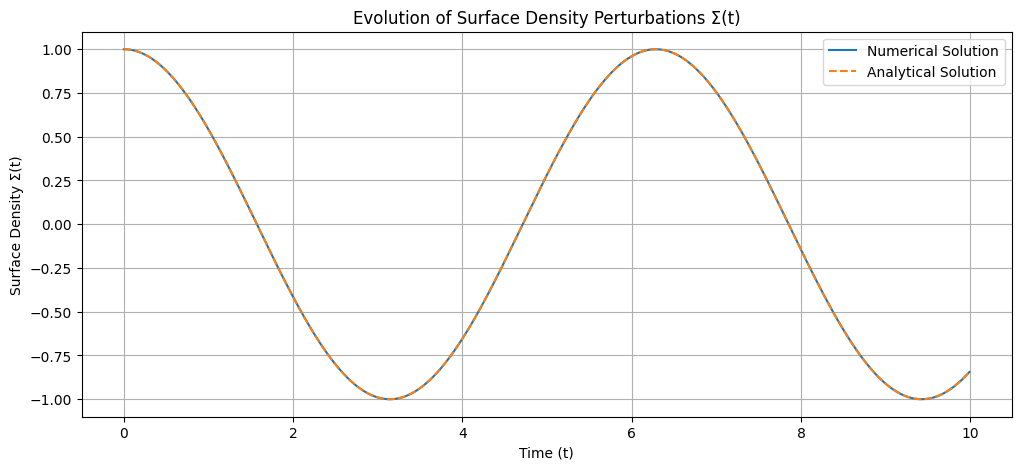

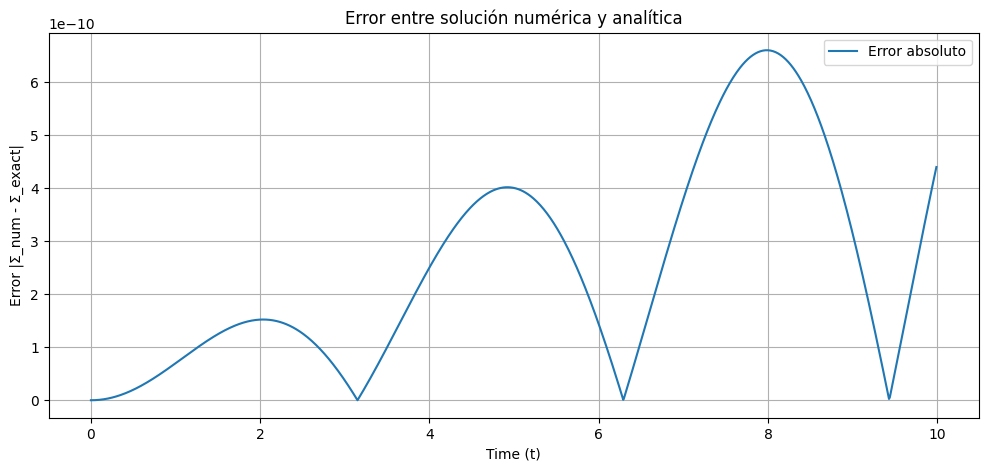

Eigenvalues of the system: [0.+1.j 0.-1.j]
El sistema es estable (oscilaciones sinusoidales).


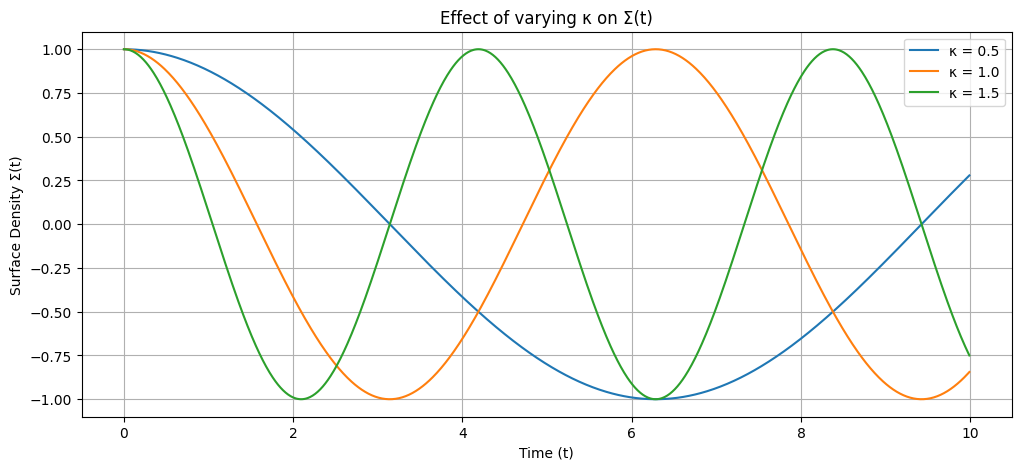

In [ ]:
# Condiciones iniciales: Sigma(0) = 1, dSigma/dt(0) = 0
sigma0 = [1, 0]

# Tiempo
t = np.arange(0, 10, 0.01)

# Valor inicial de kappa
kappa = 1.0

# Resolver el sistema
sigma = runge_kutta_4(jeans_eq, sigma0, t, kappa)

# Solución analítica: Σ(t) = Σ(0) cos(κt)
sigma_analytical = sigma0[0] * np.cos(kappa * t)

# Gráfica de evolución temporal
plt.figure(figsize=(12, 5))
plt.plot(t, sigma[:, 0], label='Numerical Solution')
plt.plot(t, sigma_analytical, '--', label='Analytical Solution')
plt.title('Evolution of Surface Density Perturbations Σ(t)')
plt.xlabel('Time (t)')
plt.ylabel('Surface Density Σ(t)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica del error absoluto
plt.figure(figsize=(12, 5))
plt.plot(t, np.abs(sigma[:, 0] - sigma_analytical), label='Error absoluto')
plt.title('Error entre solución numérica y analítica')
plt.xlabel('Time (t)')
plt.ylabel('Error |Σ_num - Σ_exact|')
plt.legend()
plt.grid(True)
plt.show()

# Estabilidad: calcular autovalores de la matriz del sistema
A = np.array([[0, 1], [-kappa**2, 0]])
eigenvalues = np.linalg.eigvals(A)
print('Eigenvalues of the system:', eigenvalues)

# Análisis de estabilidad basado en los autovalores
if np.any(eigenvalues.real > 0):
    print("El sistema es inestable (existe crecimiento exponencial).")
else:
    print("El sistema es estable (oscilaciones sinusoidales).")

# Análisis de estabilidad al variar kappa
kappa_values = [0.5, 1.0, 1.5]
plt.figure(figsize=(12, 5))

for kappa in kappa_values:
    sigma = runge_kutta_4(jeans_eq, sigma0, t, kappa)
    plt.plot(t, sigma[:, 0], label=f'κ = {kappa}')

plt.title('Effect of varying κ on Σ(t)')
plt.xlabel('Time (t)')
plt.ylabel('Surface Density Σ(t)')
plt.legend()
plt.grid(True)
plt.show()
